In [19]:
import pandas as pd
import numpy as np
import datetime as DT
import matplotlib.pyplot as plt
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import tree
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import ensemble
#import pydotplus
#import io
import collections
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.patches as patches


In [20]:
data = pd.read_csv('emporiosirenuse_community_stat.csv',sep=",")


In [21]:
data.head()

,brandname,followers,processedUsers,privateUsers,nopostsUsers,missingUsers,%communityCovered,#communityPosts
0,muzungusisters,66938,22637,34576,3958,8016,88.03,2910277
1,miguelinagambaccini,83848,5634,32186,12930,43561,47.11,670195
2,zeusndione,27624,11384,13540,1694,1899,93.14,1170628
3,dodobaror,89500,31772,40838,6527,13613,84.80,2974526
4,lisamariefernandez,83411,26993,38743,5193,15327,81.63,3230855


In [22]:

data2 = pd.read_csv('emporiosirenuse_domain_stat.csv',sep=",")
data2.head()

,brandname,#posts,%geolocated,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers
0,miguelinagambaccini,274,60.58,99,139228,1116,921,448,460,82358
1,muzungusisters,262,35.50,48,194003,194,2588,497,79,66950
2,zeusndione,206,20.87,31,131323,1257,883,283,162,27673
3,dodobaror,83,27.71,20,98276,25,1563,556,355,89562
4,lisamariefernandez,335,75.52,96,213419,700,3096,728,553,83421


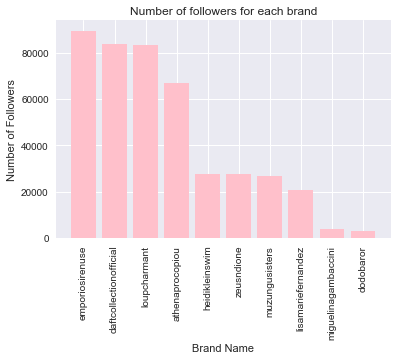

In [25]:
a = data.groupby('brandname').sum()['followers']
adf = a.sort_values().reset_index()[-11:]
adf = adf.sort_values(by = ['followers'], ascending=False)
top10produce= adf
top10produce


ind = np.arange(10)
#plt.bar(intop10['Billing city'], top10['gross_sales'], color="b")
top10produce = pd.DataFrame(top10produce)

top10produce['brandname'].unique()


ind = np.arange(10)
#plt.bar(intop10['Billing city'], top10['gross_sales'], color="b")
plt.bar(ind,top10produce['followers'], color="pink")
plt.xticks(rotation=90)
plt.xticks(ind, ['emporiosirenuse', 'daftcollectionofficial', 'loupcharmant',
       'athenaprocopiou', 'heidikleinswim', 'zeusndione', 'muzungusisters',
       'lisamariefernandez', 'miguelinagambaccini', 'dodobaror'])
plt.xlabel("Brand Name")
plt.ylabel("Number of Followers")
plt.title('Number of followers for each brand')
plt.savefig("Number_followers_brand.svg")
plt.figure(figsize=(12,12))

plt.show()







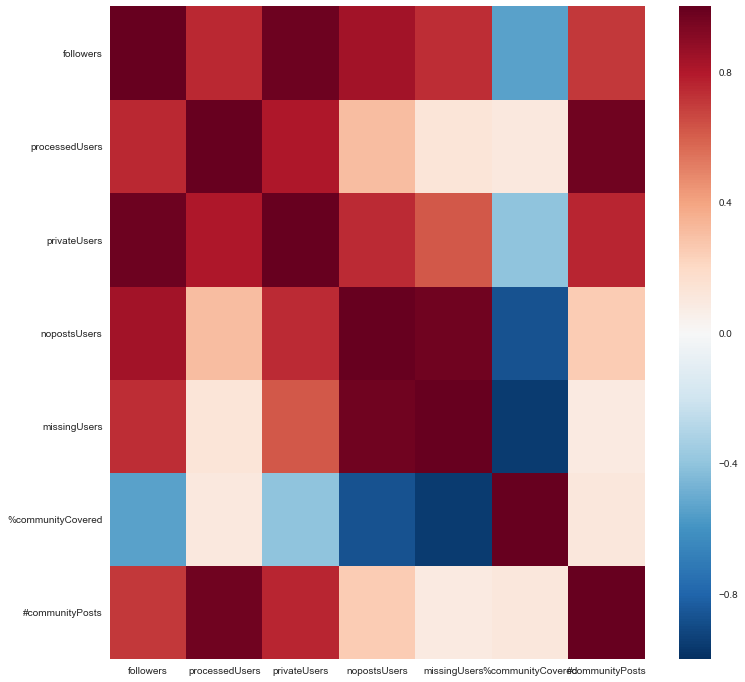

In [26]:
data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())

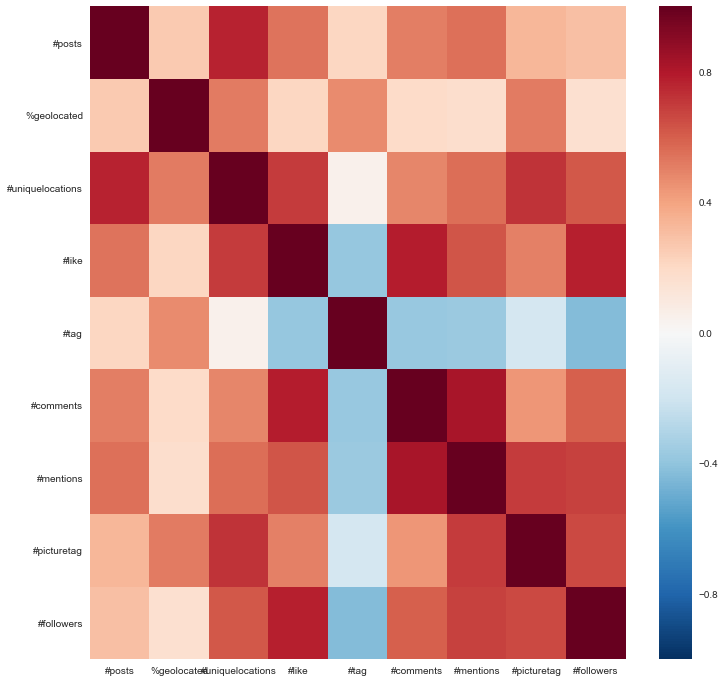

In [27]:
data2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data2.corr())

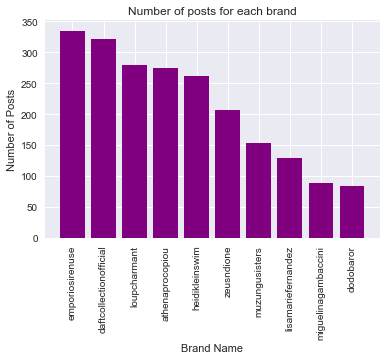

In [26]:
a = data2.groupby('brandname').sum()['#posts']
adf = a.sort_values().reset_index()[-11:]
adf = adf.sort_values(by = ['#posts'], ascending=False)
top10produce= adf
top10produce


ind = np.arange(10)
#plt.bar(intop10['Billing city'], top10['gross_sales'], color="b")
top10produce = pd.DataFrame(top10produce)

top10produce['brandname'].unique()


ind = np.arange(10)
#plt.bar(intop10['Billing city'], top10['gross_sales'], color="b")
plt.bar(ind,top10produce['#posts'], color="purple")
plt.xticks(rotation=90)
plt.xticks(ind, ['emporiosirenuse', 'daftcollectionofficial', 'loupcharmant',
       'athenaprocopiou', 'heidikleinswim', 'zeusndione', 'muzungusisters',
       'lisamariefernandez', 'miguelinagambaccini', 'dodobaror'])
plt.xlabel("Brand Name")
plt.ylabel("Number of Posts")
plt.title('Number of posts for each brand')
plt.savefig("Number_posts_2382987928798732987brand.svg")
plt.figure(figsize=(12,12))
#plt.savefig("Number_posts_2382987928798732987brand.svg")
plt.show()
#plt.savefig("Number_posts_2382987928798732987brand.svg")

In [42]:
data2.head()

,brandname,#posts,%geolocated,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers
0,miguelinagambaccini,274,60.58,99,139228,1116,921,448,460,82358
1,muzungusisters,262,35.50,48,194003,194,2588,497,79,66950
2,zeusndione,206,20.87,31,131323,1257,883,283,162,27673
3,dodobaror,83,27.71,20,98276,25,1563,556,355,89562
4,lisamariefernandez,335,75.52,96,213419,700,3096,728,553,83421


In [69]:
data.head()

,brandname,followers,processedUsers,privateUsers,nopostsUsers,missingUsers,%communityCovered,#communityPosts
0,muzungusisters,66938,22637,34576,3958,8016,88.03,2910277
1,miguelinagambaccini,83848,5634,32186,12930,43561,47.11,670195
2,zeusndione,27624,11384,13540,1694,1899,93.14,1170628
3,dodobaror,89500,31772,40838,6527,13613,84.80,2974526
4,lisamariefernandez,83411,26993,38743,5193,15327,81.63,3230855


In [46]:
df_LC.columns

Index(['brandname', '#posts', '#uniquelocations', '#like', '#tag', '#comments',
       '#mentions', '#picturetag', '#followers'],
      dtype='object')

In [67]:
df.head()

,brandname,followers,processedUsers,privateUsers,nopostsUsers,missingUsers,%communityCovered,#communityPosts
0,muzungusisters,66938,22637,34576,3958,8016,88.03,2910277
1,miguelinagambaccini,83848,5634,32186,12930,43561,47.11,670195
2,zeusndione,27624,11384,13540,1694,1899,93.14,1170628
3,dodobaror,89500,31772,40838,6527,13613,84.80,2974526
4,lisamariefernandez,83411,26993,38743,5193,15327,81.63,3230855
5,athenaprocopiou,26591,10215,12229,1434,3461,86.98,1301625
6,emporiosirenuse,3113,1552,1374,0,201,93.55,223376
7,heidikleinswim,27426,8695,15330,0,3408,87.57,983286
8,loupcharmant,20446,12172,4933,705,2922,85.71,1796469
9,daftcollectionofficial,3782,2619,595,53,540,85.71,458622


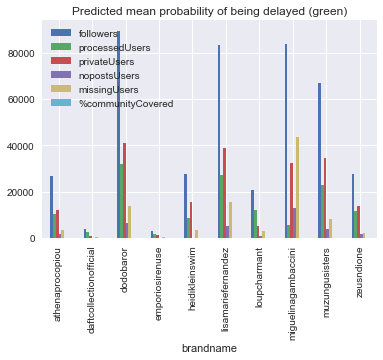

In [15]:
df = data.groupby("brandname").mean()
del df['#communityPosts']
df.plot(kind='bar', title = "Predicted mean probability of being delayed (green)")

In [85]:
columns = ['#posts', '#uniquelocations', '#like', '#tag', '#comments', '#mentions',
       '#picturetag', '#followers']
for i,v in enumerate(columns):
    df[str(v)] = df[str(v)]/df['#followers']

In [88]:
df.head()

,#posts,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers
brandname,,,,,,,,
athenaprocopiou,15.017073,4.711239,1.126822,166.954522,160.083965,43.186355,37.002854,1.0
daftcollectionofficial,10.803929,0.849747,1.148676,52.927113,77.205606,17.480514,4.491521,1.0
dodobaror,7.278986,1.753973,1.008143,2.192466,137.072962,48.760439,31.133014,1.0
emporiosirenuse,16.034271,1.740153,1.232257,418.879784,69.233246,27.469564,18.395907,1.0
heidikleinswim,31.509284,5.773440,1.079859,495.928732,116.055935,36.891305,17.222466,1.0


In [87]:
data2.head()

,brandname,#posts,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers
0,miguelinagambaccini,274,99,139228,1116,921,448,460,82358
1,muzungusisters,262,48,194003,194,2588,497,79,66950
2,zeusndione,206,31,131323,1257,883,283,162,27673
3,dodobaror,83,20,98276,25,1563,556,355,89562
4,lisamariefernandez,335,96,213419,700,3096,728,553,83421


In [112]:
df['#like'].min()

12868

In [123]:
for row in df:
    print(row)

#posts
#uniquelocations
#like
#tag
#comments
#mentions
#picturetag
#followers


In [164]:
df.columns

Index(['#posts', '%geolocated', '#uniquelocations', '#like', '#tag',
       '#comments', '#mentions', '#picturetag', '#followers', 'averagepost'],
      dtype='object')

In [160]:
df[(str('#like'))][2]

98276

In [173]:


import numpy as np

df = data2.groupby("brandname").mean()
"""
columns = ['#posts', '%geolocated', '#uniquelocations', '#like', '#tag',
       '#comments', '#mentions', '#picturetag', '#followers', 'averagepost']


for i,v in enumerate(columns):
    columnmin= df[str(v)].min()
    columnmax = df[str(v)].max()
    
    for i,v in enumerate(columns):
        row = df[(str(columns))][i]
        Xnorm = (row-columnmin)/(columnmax - columnmin)
        print(v)
"""        
for i,v in enumerate(df):
    columnmin= df[str(v)].min()
    columnmax = df[str(v)].max()
    
    for i in range(len(df[str(v)])):
        df[str(v)][i] = (df[str(v)][i] - min)/(columnmax - columnmin)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [174]:
df

,#posts,%geolocated,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers,averagepost
brandname,,,,,,,,,,
athenaprocopiou,0,0.902010,0,0,0,0,0,0,0,0.608728
daftcollectionofficial,0,0.122835,0,0,0,0,0,0,0,0.139094
dodobaror,0,0.378643,0,0,0,0,0,0,1,1.139094
emporiosirenuse,0,1.122835,0,0,0,0,0,0,0,0.150703
heidikleinswim,1,0.708651,0,0,1,0,0,0,0,0.185313
lisamariefernandez,1,1.031963,1,1,0,1,1,1,0,0.612884
loupcharmant,1,0.273286,0,0,0,0,1,0,0,0.191248
miguelinagambaccini,1,0.827809,1,0,0,0,0,0,0,0.488839
muzungusisters,1,0.485093,0,0,0,1,0,0,0,0.712356


In [119]:
#df[[] =     (df[[]] - df[].min())/ (df[].max() - df[].min())
import numpy as np

df = data2.groupby("brandname").mean()

columns = ['#posts', '#uniquelocations', '#like', '#tag', '#comments', '#mentions',
       '#picturetag', '#followers']

companies = ['miguelinagambaccini', 'muzungusisters', 'zeusndione', 'dodobaror',
       'lisamariefernandez', 'athenaprocopiou', 'emporiosirenuse',
       'heidikleinswim', 'loupcharmant', 'daftcollectionofficial']

for i,v in enumerate(df):
    min = df[str(v)].min()
    
    for i,v in emunerate(companies):
        row = df.iloc[(i):(i+1),:]
        #df[str(v)]=  df[str(v)].apply(lambda x: x/df[str(v)].min())
        print(i, v, df[str(v)][i])
        
################


0 #posts 153
1 #uniquelocations 7
2 #like 98276
3 #tag 3370
4 #comments 1186
5 #mentions 728
6 #picturetag 253
7 #followers 82358


In [122]:
data2['brandname'].unique()

array(['miguelinagambaccini', 'muzungusisters', 'zeusndione', 'dodobaror',
       'lisamariefernandez', 'athenaprocopiou', 'emporiosirenuse',
       'heidikleinswim', 'loupcharmant', 'daftcollectionofficial'], dtype=object)

In [145]:
row = df.iloc[2:3,:]
#column = df.iloc[:,0:2]
row

,#posts,%geolocated,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers
brandname,,,,,,,,,
dodobaror,0.000927,27.71,0.000223,1.097296,0.000279,0.017452,0.006208,0.003964,1.0


In [134]:
df.head()


,#posts,%geolocated,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers
brandname,,,,,,,,,
athenaprocopiou,0.005753,66.01,0.001805,3.640469,0.063964,0.061332,0.016546,0.014177,1.0
daftcollectionofficial,0.023539,8.99,0.001851,3.403332,0.115313,0.168209,0.038085,0.009786,1.0
dodobaror,0.000927,27.71,0.000223,1.097296,0.000279,0.017452,0.006208,0.003964,1.0
emporiosirenuse,0.041359,82.17,0.004489,6.479000,1.080475,0.178583,0.070856,0.047451,1.0
heidikleinswim,0.011741,51.86,0.002151,2.261659,0.184795,0.043245,0.013747,0.006418,1.0


In [ ]:
#x-xmin/xmax - x min

import numpy as np

df = data2.groupby("brandname").mean()

columns = ['#posts', '#uniquelocations', '#like', '#tag', '#comments', '#mentions',
       '#picturetag', '#followers']

for i,v in enumerate(columns):
    df[str(v)] = df[str(v)]/df['#followers']


del df['#followers']
df['#like'] = np.log(df['#like'])

df.plot(kind='bar', title = "F.M. please edit")

In [127]:
df.head()

,#posts,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers
brandname,,,,,,,,
athenaprocopiou,0.005753,0.001805,3.640469,0.063964,0.061332,0.016546,0.014177,1.0
daftcollectionofficial,0.023539,0.001851,3.403332,0.115313,0.168209,0.038085,0.009786,1.0
dodobaror,0.000927,0.000223,1.097296,0.000279,0.017452,0.006208,0.003964,1.0
emporiosirenuse,0.041359,0.004489,6.479000,1.080475,0.178583,0.070856,0.047451,1.0
heidikleinswim,0.011741,0.002151,2.261659,0.184795,0.043245,0.013747,0.006418,1.0


In [133]:
data2['averagepost'] = data2['#like']/data2['#posts']
data2.sort_values(by='averagepost',ascending=False)

,brandname,#posts,%geolocated,#uniquelocations,#like,#tag,#comments,#mentions,#picturetag,#followers,averagepost
3,dodobaror,83,27.71,20,98276,25,1563,556,355,89562,1184.048193
1,muzungusisters,262,35.50,48,194003,194,2588,497,79,66950,740.469466
2,zeusndione,206,20.87,31,131323,1257,883,283,162,27673,637.490291
4,lisamariefernandez,335,75.52,96,213419,700,3096,728,553,83421,637.071642
5,athenaprocopiou,153,66.01,48,96811,1701,1631,440,377,26593,632.751634
0,miguelinagambaccini,274,60.58,99,139228,1116,921,448,460,82358,508.131387
8,loupcharmant,280,20.00,32,55663,434,1629,635,253,20446,198.796429
7,heidikleinswim,322,51.86,59,62026,5068,1186,377,176,27425,192.627329
6,emporiosirenuse,129,82.17,14,20208,3370,557,221,148,3119,156.651163
9,daftcollectionofficial,89,8.99,7,12868,436,636,144,37,3781,144.584270


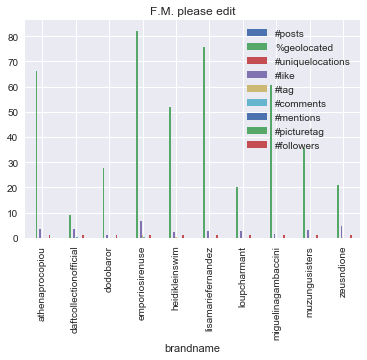

In [129]:
import numpy as np

df = data2.groupby("brandname").mean()

columns = ['#posts', '#uniquelocations', '#like', '#tag', '#comments', '#mentions',
       '#picturetag', '#followers']

for i,v in enumerate(columns):
    df[str(v)] = df[str(v)]/df['#followers']



df.plot(kind='bar', title = "F.M. please edit")

#comments, likes v
#geo loc, hashtags, 
#mention picture tag


fig, axs = plt.subplots(2,1,figsize=(10,8))
labels1, 
values1 = zip(*Counter(timely['AIRLINE']).items())
labels2, values2 = zip(*Counter(delay['AIRLINE']).items())
indexes2 = np.arange(len(labels2))
width = 1
axs[0].bar(indexes2, values2, width, color="r")
width = 0.8
highPower = values1
lowPower = values2
indices = np.arange(len(highPower))
plt.bar(indices, highPower, width=width,
color='b', label='Timely flights')
plt.bar([i+0.25*width for i in indices], lowPower,
width=0.5*width, color='r', alpha=0.5, label='Delayed flights')
plt.xticks(indexes2 + width * 0.5, labels2)
plt.legend()
plt.xlabel("Airline")
plt.ylabel("Number of Flights Total")
plt.title('Do Delays Vary Across Airlines? Yes- see red')
plt.show()